In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [3]:
accident= pd.read_csv(r"C:\Users\natal\Downloads\archive (2)\US_Accidents_March23.csv")

In [5]:
missing_values = accident.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                   

In [9]:
accident = accident.dropna(subset=['Start_Time', 'Start_Lat', 'Start_Lng', 'Severity', 'Weather_Condition'])
accident['Start_Time'] = pd.to_datetime(accident['Start_Time'], errors='coerce')
accident= accident.dropna(subset=['Start_Time'])

In [10]:
accident['Start_Time'] = pd.to_datetime(accident['Start_Time'])
accident['Year'] = accident['Start_Time'].dt.year
accident['Month'] = accident['Start_Time'].dt.month
accident['Day'] = accident['Start_Time'].dt.day
accident['Hour'] = accident['Start_Time'].dt.hour

In [11]:
print(accident.describe())

           Severity                     Start_Time     Start_Lat  \
count  6.829766e+06                        6829766  6.829766e+06   
mean   2.228270e+00  2020-03-22 00:50:19.649124352  3.620949e+01   
min    1.000000e+00            2016-01-14 20:18:33  2.455480e+01   
25%    2.000000e+00  2018-09-18 06:36:38.249999872  3.339449e+01   
50%    2.000000e+00            2020-06-22 22:09:37  3.578575e+01   
75%    2.000000e+00  2021-10-29 08:42:38.249999872  4.010958e+01   
max    4.000000e+00            2023-03-31 23:30:00  4.900220e+01   
std    4.978002e-01                            NaN  5.073794e+00   

          Start_Lng       End_Lat       End_Lng  Distance(mi)  Temperature(F)  \
count  6.829766e+06  3.491992e+06  3.491992e+06  6.829766e+06    6.805356e+06   
mean  -9.477817e+01  3.629813e+01 -9.607276e+01  5.129303e-01    6.169836e+01   
min   -1.246238e+02  2.456601e+01 -1.245457e+02  0.000000e+00   -8.900000e+01   
25%   -1.172202e+02  3.346752e+01 -1.178420e+02  0.000000e+00  

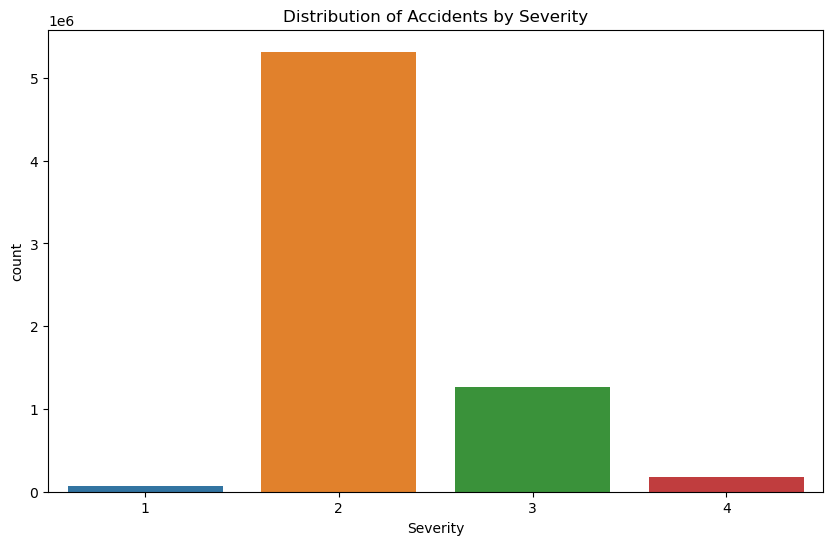

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity', data=accident)
plt.title('Distribution of Accidents by Severity')
plt.show()

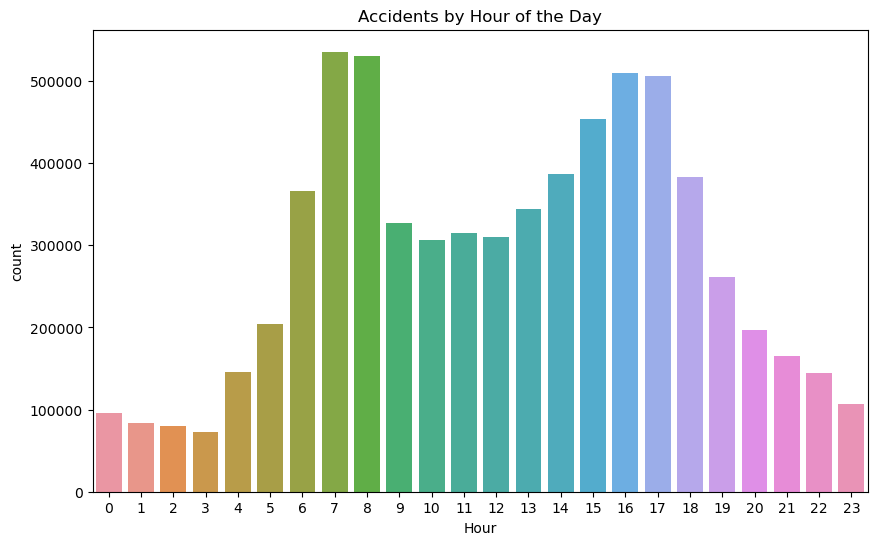

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=accident)
plt.title('Accidents by Hour of the Day')
plt.show()

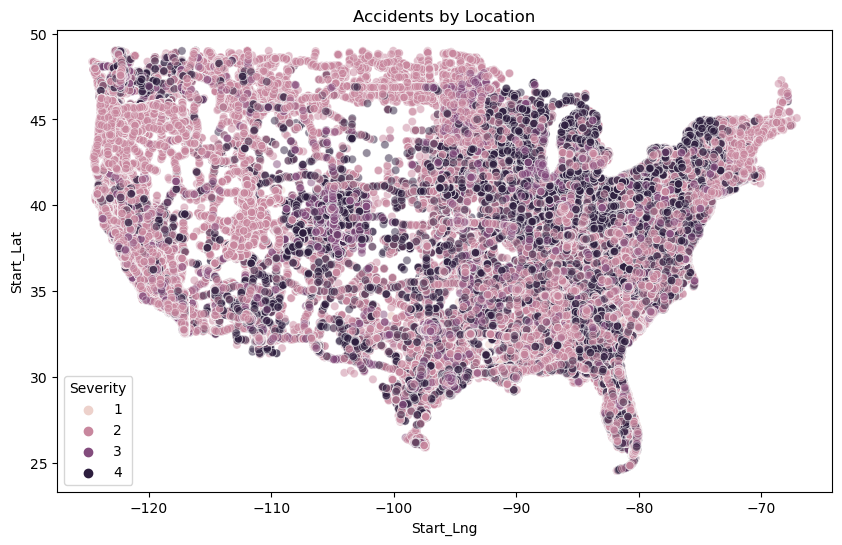

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=accident, alpha=0.5)
plt.title('Accidents by Location')
plt.show()

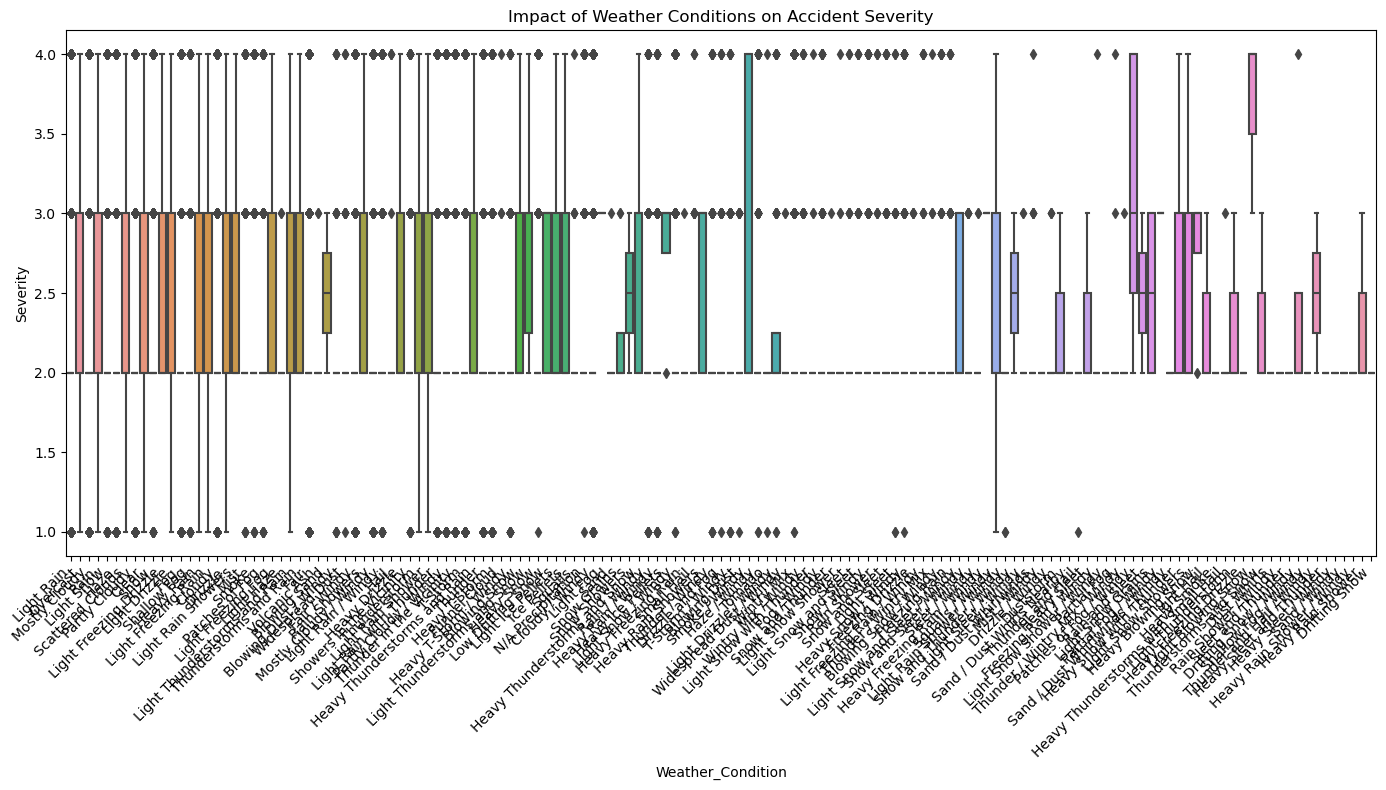

In [20]:
plt.figure(figsize=(14, 8)) 
sns.boxplot(x='Weather_Condition', y='Severity', data=accident)
plt.title('Impact of Weather Conditions on Accident Severity')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

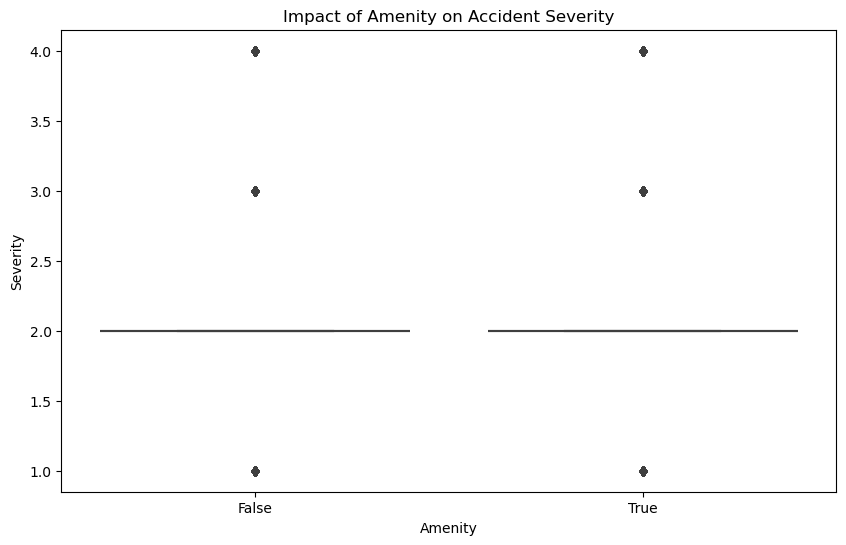

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Amenity', y='Severity', data=accident)
plt.title('Impact of Amenity on Accident Severity')
plt.show()

In [17]:
map_center = [accident['Start_Lat'].mean(), accident['Start_Lng'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

In [18]:
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in accident.iterrows()]
HeatMap(heat_data).add_to(m)

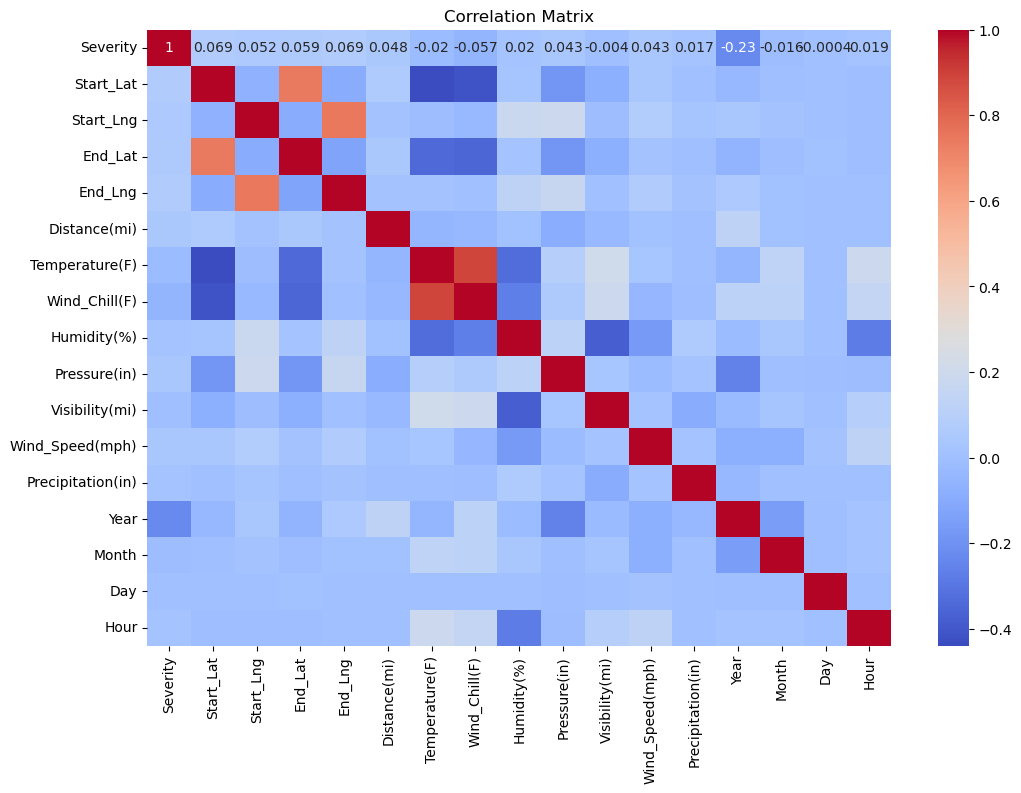

In [21]:
numeric_accident = accident.select_dtypes(include=[float, int])
numeric_accident = numeric_accident.fillna(numeric_accident.mean())
correlation_matrix = numeric_accident.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()